# Problem
Predict the ice cream shop's revenue, need to build a one-day revenue forecast model ($ usd) based on the weather outside.

Input: Outside air temperature <br>
Output: Total daily sales

I use Regression Model and Polynomial to solve this problem. In addtion, I have K-fold cross validation to evaluate machine learning models.

In [60]:
# Import the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.patches as mpatches

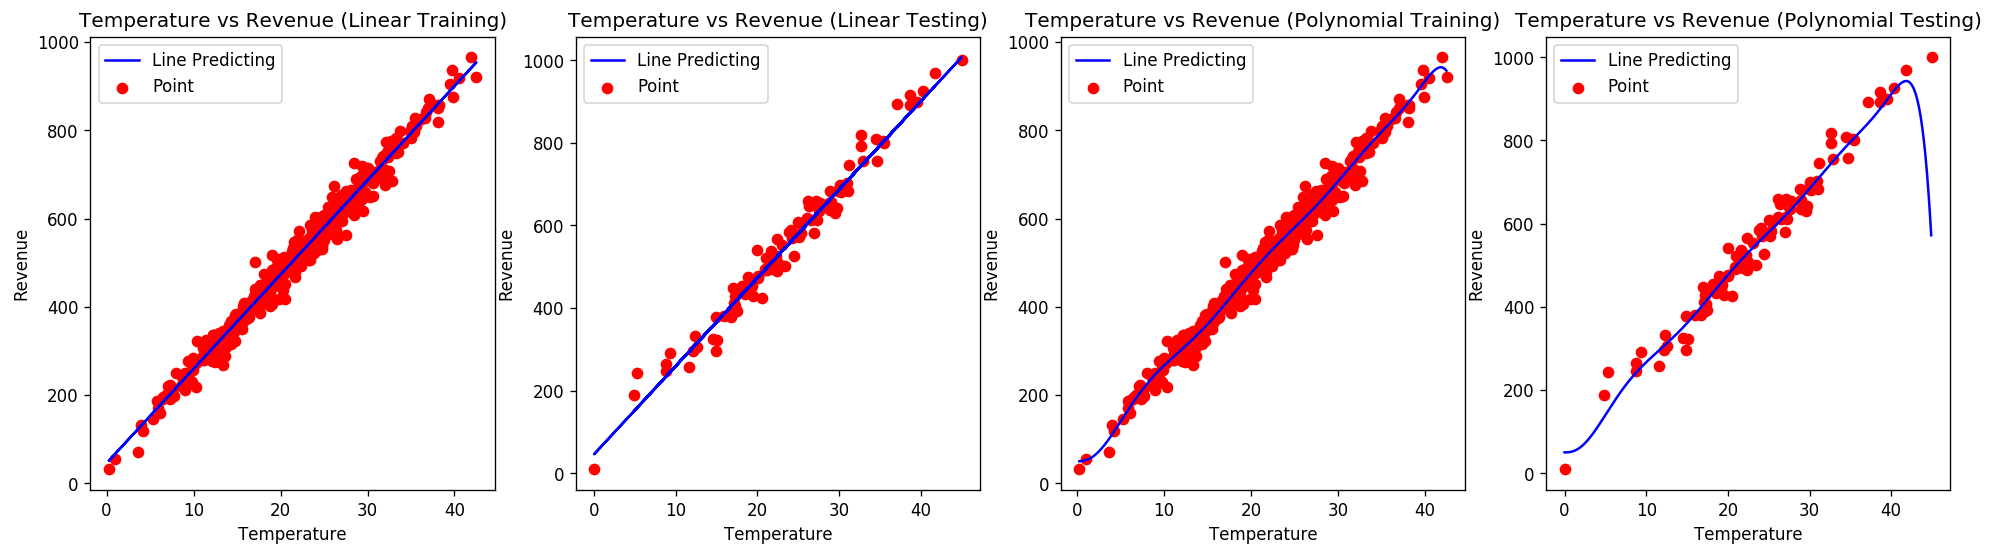

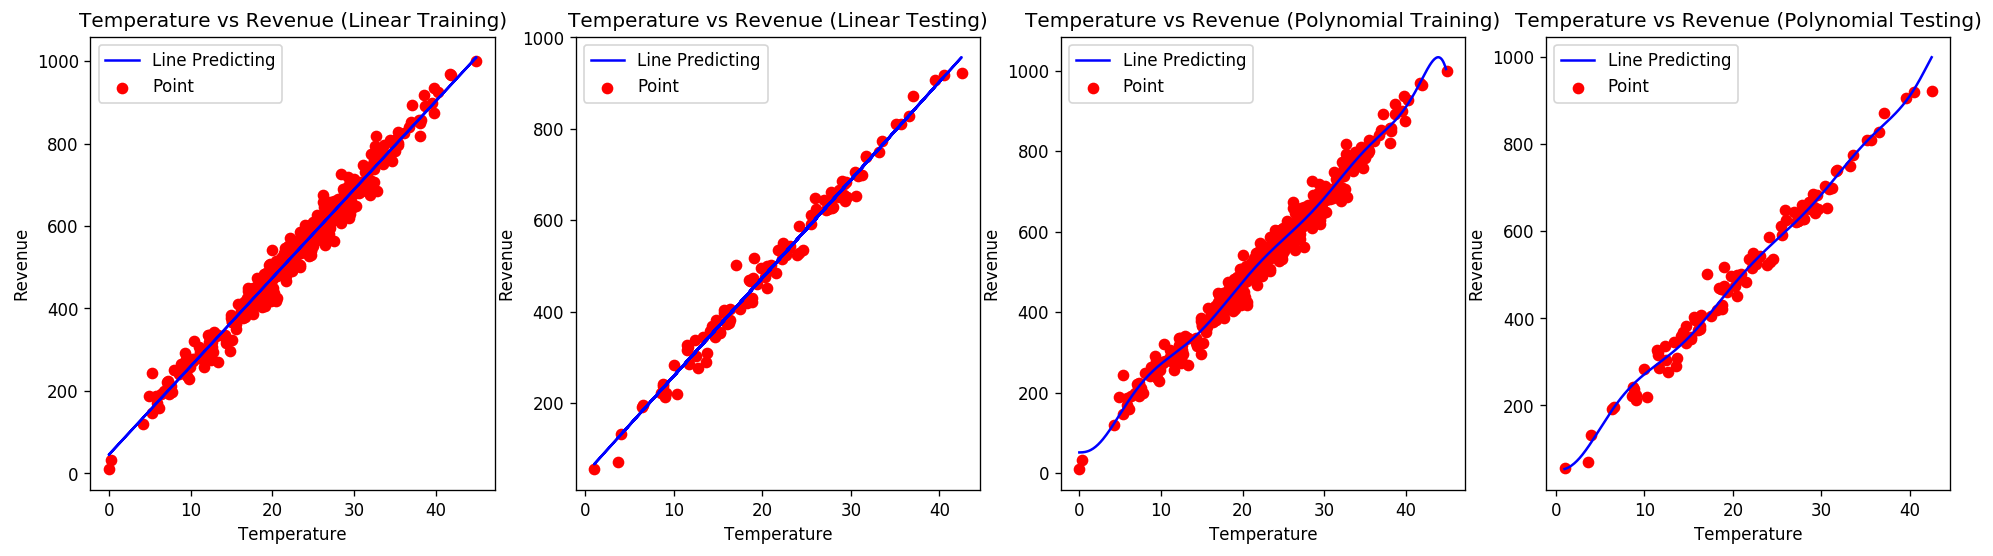

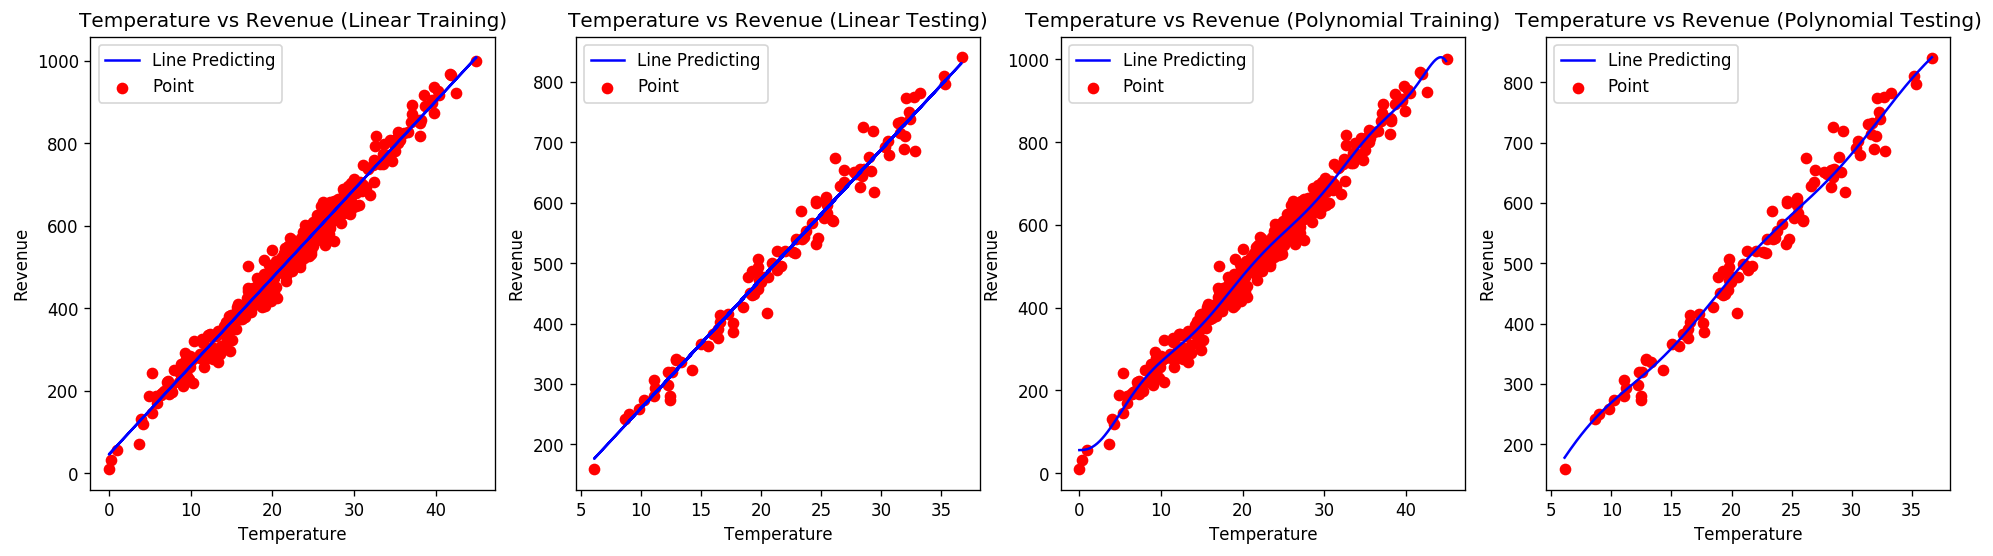

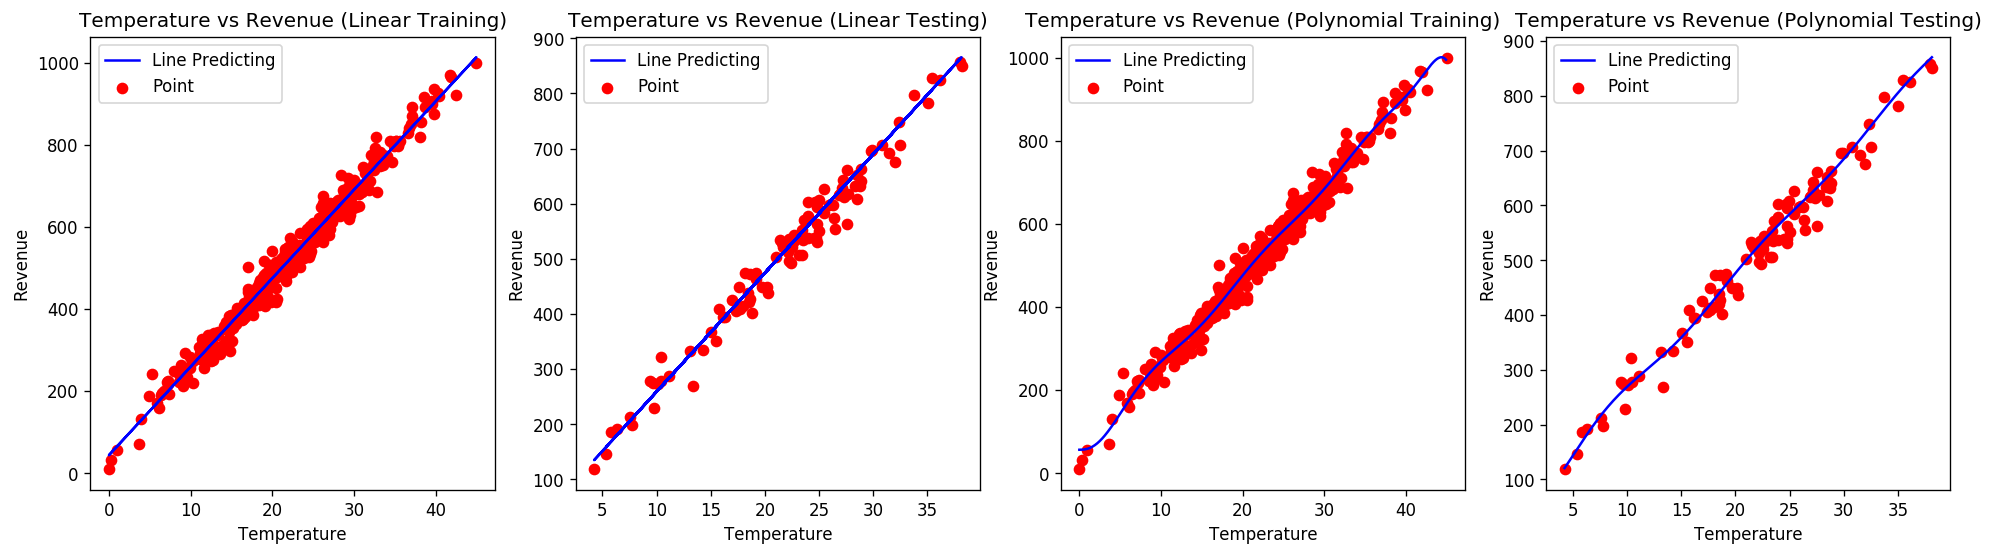

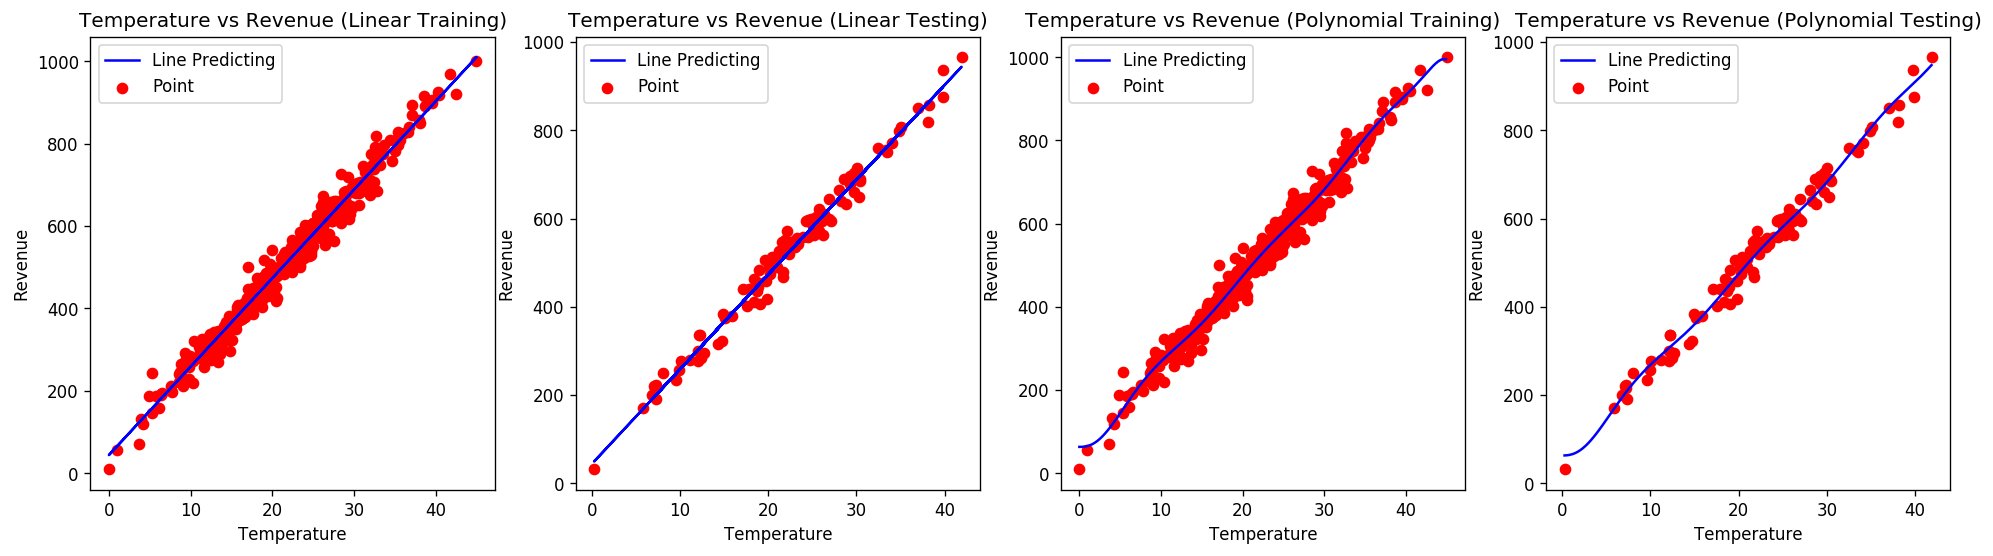

In [65]:
#Read and processing dataset
model_evaluation = pd.DataFrame(columns=['Dataset','ModelType','Metrix','Score'])
for i in range(1,6):
    train_name = 'SalesData_Train0'+str(i)+'.csv'
    test_name = 'SalesData_Test0'+str(i)+'.csv'
    dataset_train = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Revenue-prediction/Datasets/%s" %train_name)
    dataset_test = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Revenue-prediction/Datasets/%s" %test_name)
    xtitle = dataset_train.columns[1]
    ytitle = dataset_train.columns[-1]
    
    
    X_train = np.array(dataset_train.iloc[:,1].values).reshape(-1,1)
    Y_train = np.array(dataset_train.iloc[:,-1].values)
    
    X_test = np.array(dataset_test.iloc[:,1].values).reshape(-1,1)
    Y_test = np.array(dataset_test.iloc[:,-1].values)
    
    fig = plt.subplots(1,4, figsize = (20,5), sharey=True, dpi=120)
    
    #Linear Regression
        
    #Training model 
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)

    #Result Training Set
    plt.subplot(1,4,1)
    Y_train_pred = regressor.predict(X_train)
    plt.scatter(X_train, Y_train, color = "red", label = 'Point')
    plt.plot(X_train, Y_train_pred, color = "blue", label = 'Line Predicting')
    plt.title("%s vs %s (Linear Training)"%(xtitle,ytitle))
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.legend(loc='upper left')

    #Result testing set
    plt.subplot(1,4,2)
    Y_test_pred = regressor.predict(X_test)
    plt.scatter(X_test, Y_test, color = "red", label='Point')
    plt.plot(X_test, Y_test_pred, color = "blue", label = 'Line Predicting')
    #plt.scatter(X_test, Y_test_pred, color = "black")
    plt.title("%s vs %s (Linear Testing)" %(xtitle,ytitle))
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.legend(loc='upper left')

    #Polynomial Regression
    
    #Training model
    poly_transform = PolynomialFeatures(degree=10)
    X_poly = poly_transform.fit_transform(X_train)
    poly_lin_reg = LinearRegression()
    poly_lin_reg.fit(X_poly, Y_train)
    
    #Result training set
    plt.subplot(1,4,3)
    X_dummy = np.arange(min(X_train), max(X_train), 0.1).reshape(-1,1)
    X_dummy_poly = poly_transform.transform(X_dummy)
    Y_dummy_poly_pred = poly_lin_reg.predict(X_dummy_poly)
    plt.scatter(X_train, Y_train, color = "red", label = 'Point')
    plt.plot(X_dummy, Y_dummy_poly_pred, color = "blue", label = 'Line Predicting')
    plt.title("%s vs %s (Polynomial Training)" %(xtitle,ytitle))
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.legend(loc='upper left')
    
    
    #Result testing set
    plt.subplot(1,4,4)
    X_dummy = np.arange(min(X_test), max(X_test), 0.1).reshape(-1,1)
    X_dummy_poly = poly_transform.fit_transform(X_dummy)
    Y_dummy_poly_pred = poly_lin_reg.predict(X_dummy_poly)
    plt.scatter(X_test, Y_test, color = "red", label = 'Point')
    plt.plot(X_dummy, Y_dummy_poly_pred, color = "blue", label = 'Line Predicting')
    plt.title("%s vs %s (Polynomial Testing)" %(xtitle,ytitle))
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.legend(loc='upper left')
    plt.savefig("Train_Test0"+str(i)+".png",dpi=120)
    plt.show()
    # Model evaluation
#     print("R square Test 0"+str(i)+" using Linear Model =",r2_score(Y_test, Y_test_pred))
#     print("RMSE Test 0"+str(i)+" using Polynomial Model =", sqrt(mean_squared_error(Y_test, Y_test_pred)))
    X_poly = poly_transform.fit_transform(X_test)
    Y_poly_pred = poly_lin_reg.predict(X_poly)
    model_evaluation = model_evaluation.append({'Dataset': i, 
                                                'ModelType': 'SimpleLinear', 
                                                'Metrix': 'R2',
                                                'Score': r2_score(Y_test, Y_test_pred)}, 
                                               ignore_index=True)
    model_evaluation = model_evaluation.append({'Dataset': i, 
                                                'ModelType': 'SimpleLinear', 
                                                'Metrix': 'RMSE',
                                                'Score': sqrt(mean_squared_error(Y_test, Y_test_pred))}, 
                                               ignore_index=True)
    model_evaluation = model_evaluation.append({'Dataset': i, 
                                                'ModelType': 'PolynomialRegression', 
                                                'Metrix': 'R2',
                                                'Score': r2_score(Y_test, Y_poly_pred)}, 
                                               ignore_index=True)
    model_evaluation = model_evaluation.append({'Dataset': i, 
                                                'ModelType': 'PolynomialRegression', 
                                                'Metrix': 'RMSE',
                                                'Score': sqrt(mean_squared_error(Y_test, Y_poly_pred))}, 
                                               ignore_index=True)

In [66]:
model_evaluation

,Dataset,ModelType,Metrix,Score
0,1,SimpleLinear,R2,0.974999
1,1,SimpleLinear,RMSE,28.680125
2,1,PolynomialRegression,R2,0.909727
3,1,PolynomialRegression,RMSE,54.498085
4,2,SimpleLinear,R2,0.984411
5,2,SimpleLinear,RMSE,23.837902
6,2,PolynomialRegression,R2,0.982191
7,2,PolynomialRegression,RMSE,25.478356
8,3,SimpleLinear,R2,0.976957
9,3,SimpleLinear,RMSE,23.618473
